Level 3

Task 3: (Task: Data Visualization)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load dataset
df = pd.read_csv('/content/Dataset .csv')

# output
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


1.Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

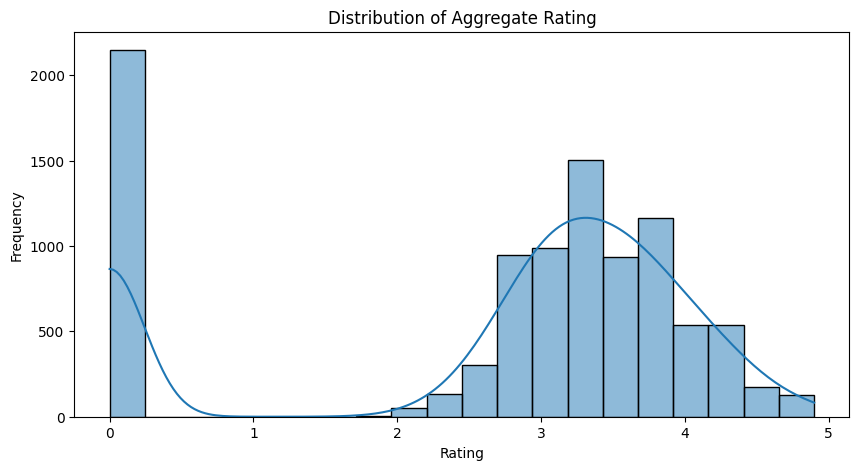

In [ ]:
# visualization 1 histogram of aggregate rating
plt.figure(figsize=(10, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

/tmp/ipython-input-39373354.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating text', data=df, order=df['Rating text'].value_counts().index, palette='viridis')


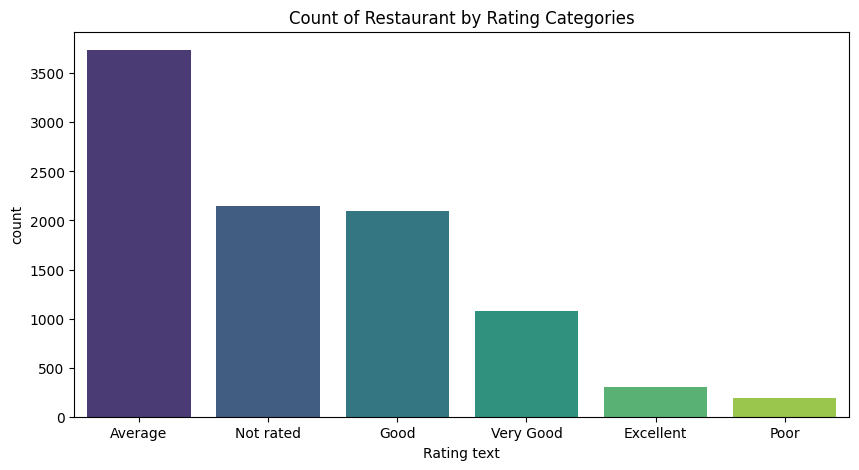

In [ ]:
# visualixation 2 count of rating categories
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating text', data=df, order=df['Rating text'].value_counts().index, palette='viridis')
plt.title('Count of Restaurant by Rating Categories')
plt.show()

2.Compare the average ratings of different cuisines or cities using appropriate visualizations.



/tmp/ipython-input-3692690701.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='City', data=city_rating, palette='coolwarm')


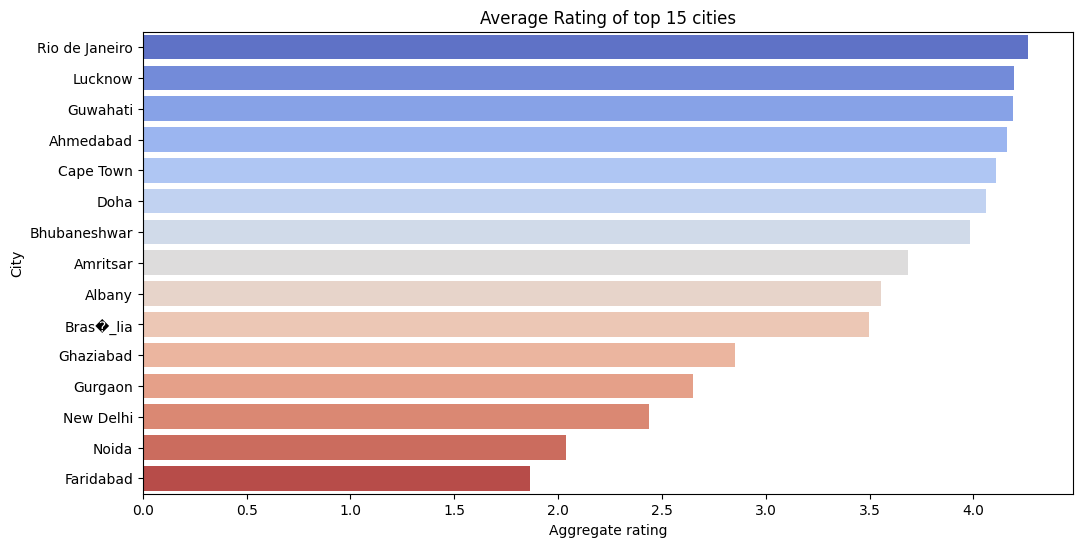

In [ ]:
# visualization 3 average rating by city
top_cities = df['City'].value_counts().nlargest(15).index
city_rating = df[df['City'].isin(top_cities)].groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='Aggregate rating', y='City', data=city_rating, palette='coolwarm')
plt.title('Average Rating of top 15 cities')
plt.show()

/tmp/ipython-input-206525454.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings, palette='magma')


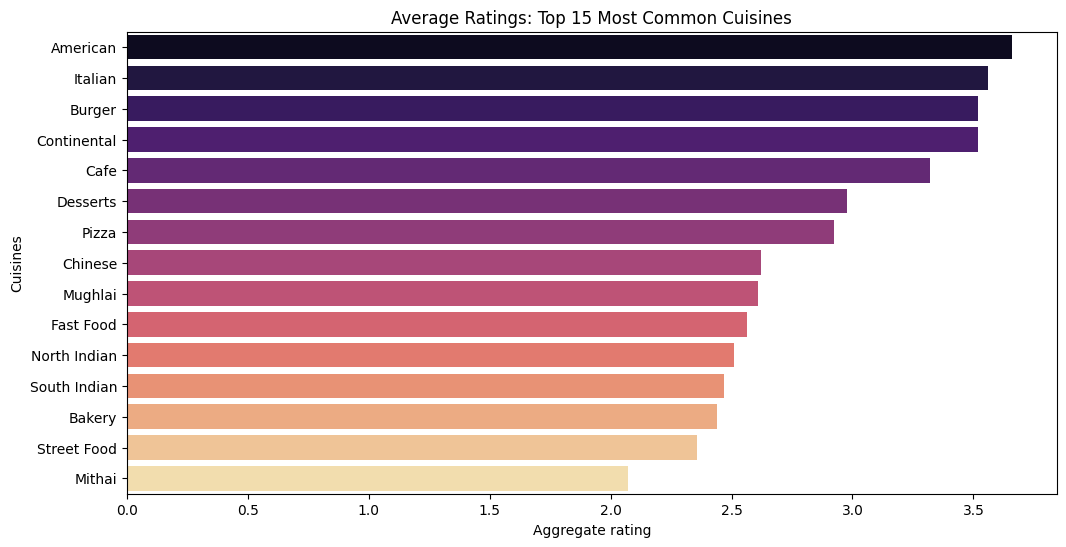

In [ ]:
# visualization 4 average rating by cuisine
df_exploded = df.dropna(subset=['Cuisines']).assign(Cuisines=df['Cuisines'].str.split(', ')).explode('Cuisines')
top_cuisines = df_exploded['Cuisines'].value_counts().nlargest(15).index
cuisine_ratings = df_exploded[df_exploded['Cuisines'].isin(top_cuisines)].groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings, palette='magma')
plt.title('Average Ratings: Top 15 Most Common Cuisines')
plt.show()

3.Visualize the relationship between various features and the target variable to gain insights.

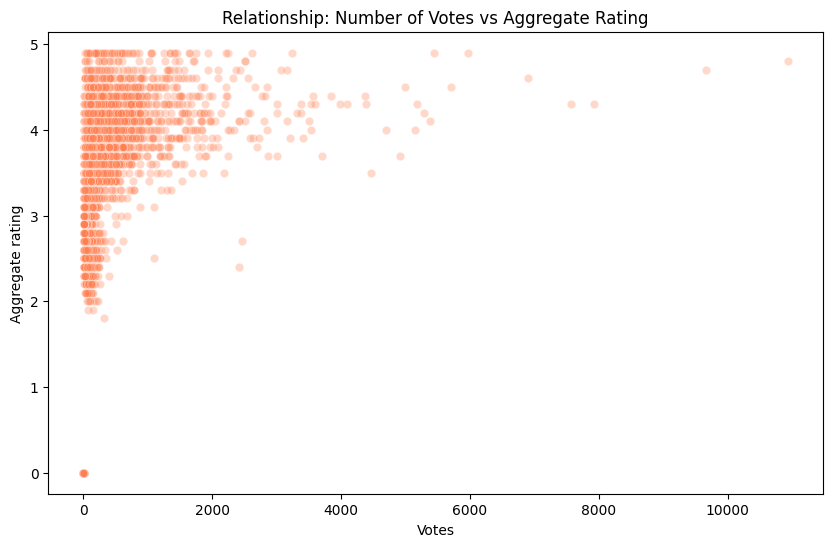

In [ ]:
# visualization 5 vote vs aggregate rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df, alpha=0.3, color='coral')
plt.title('Relationship: Number of Votes vs Aggregate Rating')
plt.show()

/tmp/ipython-input-3064646668.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='Set2')


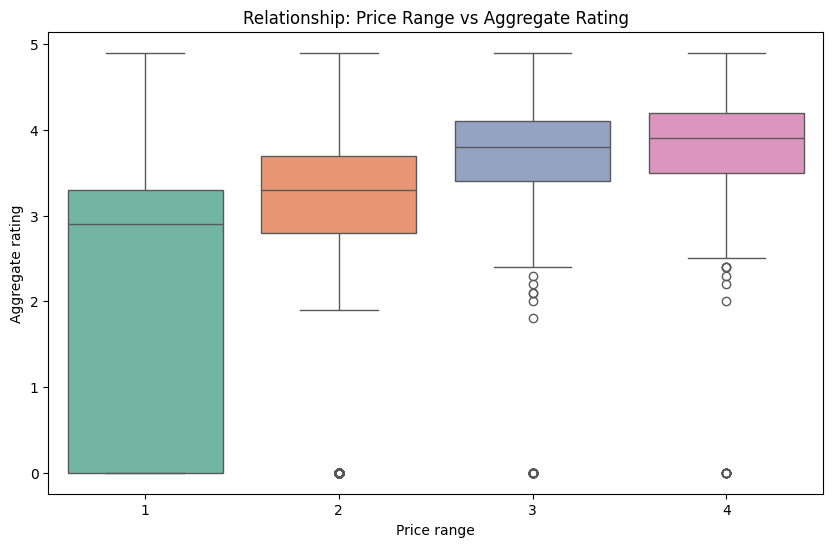

In [ ]:
# visualization 6 price range vs aggregate rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='Set2')
plt.title('Relationship: Price Range vs Aggregate Rating')
plt.show()

/tmp/ipython-input-785321380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df, palette='Set1')


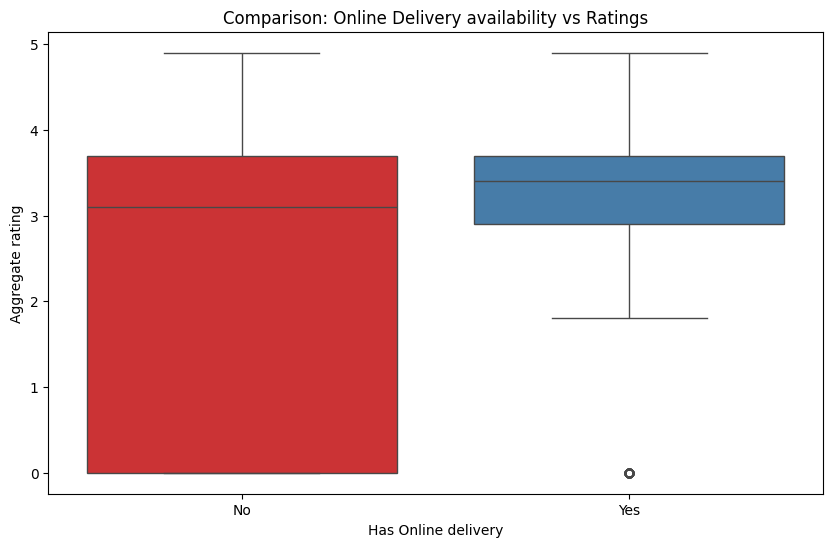

In [ ]:
# visualization 7 online delivery vs aggregate rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df, palette='Set1')
plt.title('Comparison: Online Delivery availability vs Ratings')
plt.show()

Level 3 Task 3 Successfully complited.